# Visualisation of TFBS in Promotor regions

In [1]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
tfbs_all_prom = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/prom_with_tfbs_02.bed")
df_prom_all = tfbs_all_prom.to_dataframe(names = ["chrom", "start", 'end', 'name_gene', 'score_gene', 'strand_gene', "geneID", "geneType", "expCount", "expScores", "tfbs", "start_tfbs", "end_tfbs", "strand_tfbs","unibin_cell_lines", "tfbs_count", "tfbs_count_unique"])

# Filtering merged regions and chrM out.
df_prom = df_prom_all[(df_prom_all.end - df_prom_all.start  == 200) & (df_prom_all.chrom != "chrM")]

In [19]:
df_prom_protein = df_prom[df_prom.geneType == "protein_coding"]

## Visualisation of remaining Gene Types, such as protein-coding

/tmp/ipykernel_3233908/1911211296.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


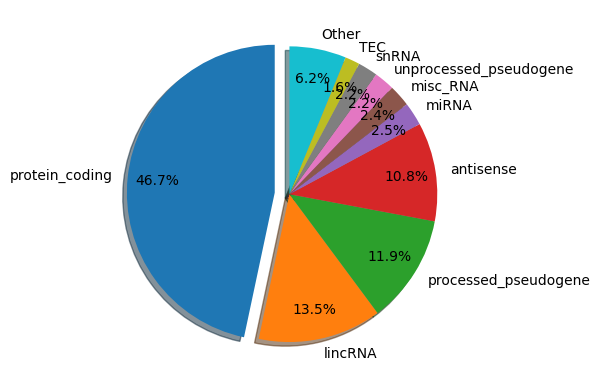

In [167]:
count_genetype = df_prom["geneType"].value_counts()
count_genetype.name = "GENCODE gene biotype"

relevant = count_genetype[:9]
other = count_genetype[10:].sum()
relevant["Other"] = other

fig = plt.figure()
relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], shadow = True, startangle= 90, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
plt.ylabel("")
fig.savefig("GTEx_genetype_count_pie_02.png")
fig.show()


## Visualisation of TFBS count in most important Gene Types

In [14]:
# TFBS count in GeneType
df_prom_type_tmp = df_prom[df_prom.geneType == "protein_coding"]
tfbs_count = df_prom_type_tmp.tfbs_count.to_numpy()

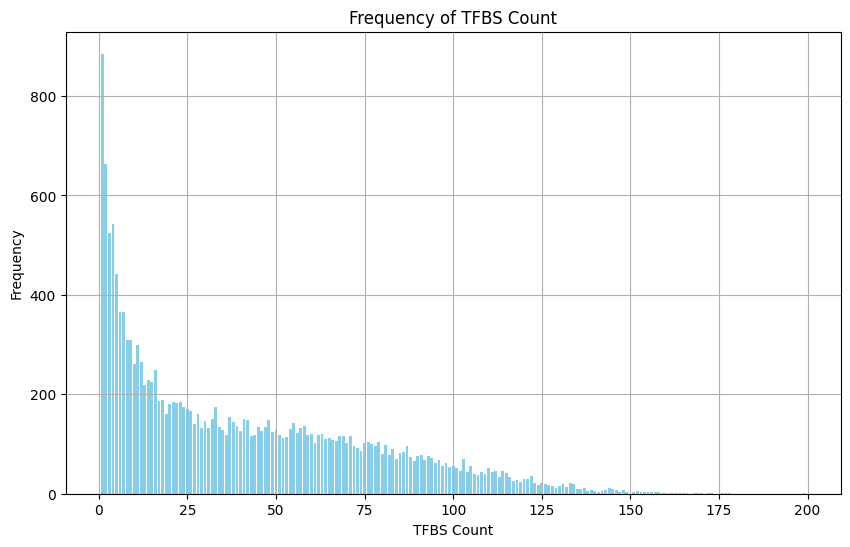

In [15]:

# Calculate unique counts and their frequencies
unique_counts, counts = np.unique(tfbs_count, return_counts=True)

# Plot the frequencies
plt.figure(figsize=(10, 6))
plt.bar(unique_counts, counts, color='skyblue')
plt.title('Frequency of TFBS Count')
plt.xlabel('TFBS Count')
plt.ylabel('Frequency')
plt.grid(True)

# Save the plot
#plt.savefig('tfbs_frequency_plot_protein_coding.png')

# Show the plot
plt.show()

## Expression by tfbs_count

In [20]:
df_sort_tfbs_count = df_prom_protein.sort_values("tfbs_count")

In [25]:
mean_exp_per_sort = np.array([np.array(x.split(",")[:-1], dtype="float64").max() for x in df_sort_tfbs_count.expScores])
mean_exp_per_sort.max()


267400.0

In [26]:
tfbs_count_sort = np.array((df_sort_tfbs_count.tfbs_count))

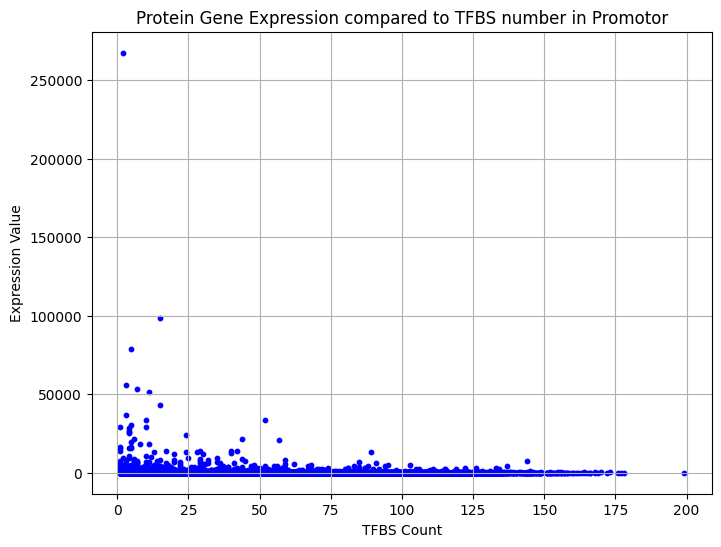

In [27]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tfbs_count_sort, mean_exp_per_sort, color='blue', marker='o', s=10)
plt.title('Protein Gene Expression compared to TFBS number in Promotor')
plt.xlabel('TFBS Count')
plt.ylabel('Expression Value')
plt.grid(True)
plt.savefig("Scatter_Gene_exp_by_tfbs_count_protein.png")
plt.show()

### Boxplot

In [28]:
mean_exp_per_sort
tfbs_count_sort

array([  1,   1,   1, ..., 177, 178, 199])

In [29]:
bins = np.arange(0, 225, 25)
binned_data = [[] for _ in range(len(bins)-1)]
for i in range(len(bins)-1):
    binned_data[i] = mean_exp_per_sort[(tfbs_count_sort >= bins[i]) & (tfbs_count_sort < bins[i+1])]

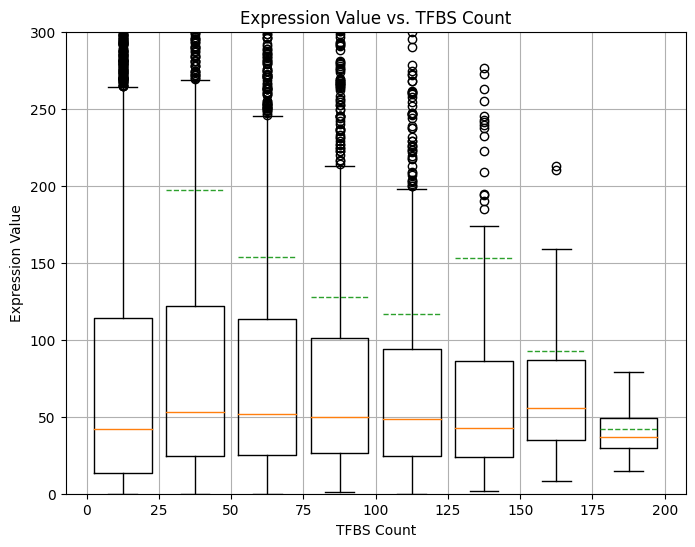

In [33]:
# Plot the box plot for each bin
plt.figure(figsize=(8, 6))
plt.boxplot(binned_data, positions=bins[:-1]+12.5, widths=20, showmeans=True, meanline=True)  # Adjust widths if needed
plt.xticks(bins, bins)
plt.xlim()
plt.ylim(0,300)
plt.title('Expression Value vs. TFBS Count')
plt.xlabel('TFBS Count')
plt.ylabel('Expression Value')
plt.grid(True)
#plt.savefig("Boxplot_Gene_exp_by_tfbs_count_protein_ZOOM.png")
plt.show()

## ds

In [90]:
df_prom

,chrom,start,end,name_gene,score_gene,strand_gene,geneID,geneType,expCount,expScores,tfbs,start_tfbs,end_tfbs,strand_tfbs,unibin_cell_lines,tfbs_count,tfbs_count_unique
0,chr1,17436,17636,MIR6859-1,0,-,ENSG00000278267.1,miRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",MYCN,17510,17522,-,NGP--neuroblastoma-,1,1
1,chr1,629439,629639,MTND2P28,730,+,ENSG00000225630.1,unprocessed_pseudogene,54,"961.4,1024,949.35,328.1,497.15,363.6,518.8,118...",OTX2,629638,629650,-,HUES64--embryonic-stem-cells-,1,1
2,chr1,634176,634376,MTCO3P12,483,+,ENSG00000198744.5,unprocessed_pseudogene,54,"19.46,17.82,28.275,9.633,12.73,13.52,11.34,40....",EGR2,634195,634206,+,HEK293--embryonic-kidney-,1,1
3,chr1,758336,758536,RNU6-1199P,0,-,ENSG00000223181.1,snRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","JUN,JUN,AR","758332,758332,758509","758348,758344,758526","-,+,+","22RV1--prostate-carcinoma-,HAEC--human-aortic-...",3,2
4,chr1,778569,778769,RP11-206L10.9,262,+,ENSG00000237491.8,lincRNA,54,"0.593,0.395,0.359,0.759,0.754,0.771,0.642,0.37...","REST,KLF9,SRF,SRF,USF2,KLF11,KLF15,KLF5,KLF1,E...","778679,778673,778679,778679,778679,778675,7786...","778700,778689,778695,778695,778693,778686,7786...","-,+,-,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,+,-,+,-,-,...","786-O--renal-carcinoma-,786-O--renal-carcinoma...",111,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37664,chrY,21405569,21405769,AC010086.5,0,+,ENSG00000236615.1,unprocessed_pseudogene,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",MYCN,21405617,21405629,+,NGP--neuroblastoma-,1,1
37665,chrY,21493318,21493518,RBMY1HP,0,+,ENSG00000169811.8,unprocessed_pseudogene,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",CEBPB,21493366,21493376,-,SU-DHL-1--Anaplastic-large-cell-lymphoma-,1,1
37666,chrY,24570001,24570201,TTTY4B,0,+,ENSG00000235412.1,lincRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",FOXA1,24570023,24570035,-,VCaP--prostate-carcinoma-,1,1
37667,chrY,26360788,26360988,RNU6-1314P,0,+,ENSG00000252948.1,snRNA,54,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NEUROD1,26360803,26360816,-,D341-Med--medulloblastoma-,1,1


In [54]:
df_prom_protein.iloc[0].loc["expScores"]

'0.476,2.931,3.785,5.717,3.104,7.932,19.06,0.533,0.466,2.218,0.426,0.624,0.832,0.502,0.906,3.641,1.063,1.393,2.443,1.184,1.704,0.085,1.628,6.077,9.004,4.419,4.035,5.286,1.32,5.469,24.38,6.885,0.453,7.537,16.455,1.632,3.584,0.702,0.282,5.292,1.8,0.734,33.27,15.92,0.531,0.794,4.91,17.48,3.423,6.864,5.414,11.29,6.696,0.046,'

In [40]:
test = pd.read_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/gtex/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep="\t", skiprows=2)

In [76]:
test[test.Name == "ENSG00000187634.11"]

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
57,ENSG00000187634.11,SAMD11,0.47623,2.93119,3.78499,5.71706,3.10458,7.93191,19.0583,0.532897,...,0.531438,0.793609,4.90961,17.484,3.4234,6.86414,5.41375,11.2932,6.69566,0.046089
